**Aim**

This notebook can be used in order to vizualise in real time the training of the Perceptron.
It connects to the serial port of Arduino and reads the values of colors and weights. 
Then it plots them to a 2D plane.

**Data input**
* The r, g, bias information used to train the perceptron
* The wr, wg, wbias, the corresponding weigts of the perceptron iterations so we can plot the separation plan and see how the training converges and when it stops.



### Import plotting libraries

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

### Import Serial communication libraries

In [18]:
import serial
ser = serial.Serial('/dev/cu.usbmodem1411', 9600)

### Update data in a 2D plot

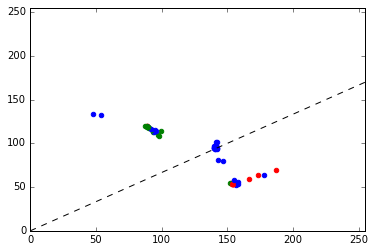

In [ ]:
from pylab import norm
import pylab as pl
from IPython import display
    
    
    
last_r = 0.
last_g = 0.
line_plot = None
log_type = None
while True:
    line = ser.readline()
    line = line.decode('utf-8').strip()
    print line
            
    line_parts = line.split(",")
    
    log_type = line_parts[0]    
    if log_type == "reading":
        r, g, c = line_parts[1:]
        r = float(r)
        g = float(g)
        
    elif log_type == "training":
        r, g, c, wr, wg, wbias = line_parts[1:]
        r = float(r)
        g = float(g)
        wr = float(wr)
        wg = float(wg)
        wbias = float(wbias)
            
        # plot the line
        x = np.arange(0, 300, 5)
        y = -1. * wr / wg * x - wbias / wg  
        if line_plot:
            l = line_plot.pop(0)
            l.remove()
            del l
        line_plot = pl.plot(x, y, '--k')


    # no need to  see every single update of serial
    if (r == last_r) and (g==last_g):
        continue
    last_r = r
    last_g = g
    
    
    pl.scatter(r, g, color=c)    
    pl.xlim([0, 255])
    pl.ylim([0, 255])
    display.clear_output(wait=True)
    display.display(pl.gcf())

